In [3]:
# data = {'description': 'ocr training set infrabel',
#        'data': array of 1d arrays containing the image,
#        'target': list of targets}

In [34]:
import os
import numpy as np
# import cv2
import skimage as skim
from skimage.io import imread
import matplotlib.pyplot as plt
from sklearn.externals import joblib 
import seaborn as sns
import pandas as pd

In [2]:
DATA_PATH = r'C:\cygwin64\home\EXK478\plprecognise\train'
EXCLUDE_FOLDERS = set(['NC'])

In [3]:
def build_ocr_training_set(data_path, exclude_folders):
    '''create a dictionary containing all images as numpy arrays and labels (based on folder name)
    in 'data' and 'label' items '''
    labels = []
    images = []
    
    folders = [folder for folder in os.listdir(data_path) if folder not in exclude_folders]

    for folder in folders:
        label = folder
        for image in os.listdir(os.path.join(data_path, folder)):
            image_path = os.path.join(data_path, folder, image)
            labels.append(label)
            images.append(imread(image_path, as_grey=True))
    
    data = {'description': 'all ocr images from plprecognise train folder with labels',
       'data': np.array(images),
       'label': np.array(labels)}
    
    return data  

def plot_random_images(data, dim=(3, 4)):  
    '''plot a random selection of images in data in a 4 by 3 matrix'''
    fig, axes = plt.subplots(*dim)
    fig.set_size_inches(3*dim[1], 3*dim[0])
    for ax in axes.flatten():
        n = np.random.randint(0, len(data['data']))
        ax.imshow(data['data'][n], cmap='gray')
        ax.set_title(data['label'][n])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticklabels([])
        ax.set_yticks([])
    fig.tight_layout()
    return axes, fig

def load_data(filename):
    '''simple load wrapper to allow switching out joblib and pickle'''
    return joblib.load(filename)

def dump_data(data, filename):
    '''simple dump wrapper to allow switching out joblib and pickle'''
    joblib.dump(data, filename)

## Loading data

In [4]:
data = build_ocr_training_set(DATA_PATH, EXCLUDE_FOLDERS)

In [101]:
_ = plot_random_images(data)

In [107]:
dump_data(data, 'data_ocr.pkl')

In [108]:
d = load_data('data_ocr.pkl')

In [7]:
data['data'][0]

array([[255, 255, 254, 248, 201, 177, 165,  24,   0,   0,   0,  10,  41,
        182, 187, 208, 255, 255, 245, 231],
       [255, 250, 225,  99,  28,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   7,  39, 109, 117, 169, 236],
       [241, 123,  29,   0,   0,   0,   0,  12, 102, 219, 219, 219, 217,
        205,  58,   0,   0,  13, 111, 239],
       [141,  60,   0,   0,   6,  78, 255, 255, 255, 255, 255, 255, 255,
        255, 249, 176,   0,   0,   0,   0],
       [  0,   0,   0,   0, 132, 204, 255, 255, 255, 255, 255, 255, 255,
        255, 253, 232, 182,  26,   0,   0],
       [  0,   0,   0,   0, 182, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255,  36,   0,   0],
       [  0,   0,   0,   0, 179, 252, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255,  40,   3,   0],
       [  0,   0,   0,   0, 176, 249, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255,  43,   4,   0],
       [  0,   0,   0,   0, 171, 243, 255, 255, 255, 255, 255, 2

## exploration

In [69]:
a = data['label']

In [72]:
df = pd.DataFrame({'label': a, 'count': a})

In [78]:
occurences = df.groupby(by='label').count()

In [80]:
occurences.plot(kind='bar')

In [2]:
# Authors: Vlad Niculae, Alexandre Gramfort
# License: BSD 3 clause

import logging
from time import time

from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

# #############################################################################
# Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data

faces.shape

(400, 4096)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/patrick/scikit_learn_data
Dataset consists of 400 faces
Extracting the top 6 Eigenfaces - PCA using randomized SVD...
done in 1.717s
Extracting the top 6 Non-negative components - NMF...
done in 4.998s
Extracting the top 6 Independent components - FastICA...
done in 2.207s
Extracting the top 6 Sparse comp. - MiniBatchSparsePCA...
done in 2.341s
Extracting the top 6 MiniBatchDictionaryLearning...
done in 3.109s
Extracting the top 6 Cluster centers - MiniBatchKMeans...
done in 0.175s
Extracting the top 6 Factor Analysis components - FA...


/usr/lib/python3.6/site-packages/sklearn/decomposition/factor_analysis.py:226: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)


done in 2.285s


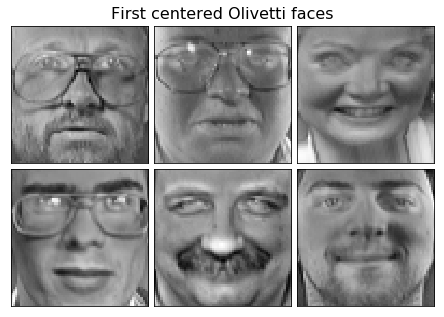

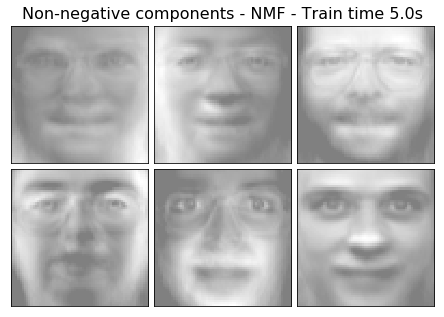

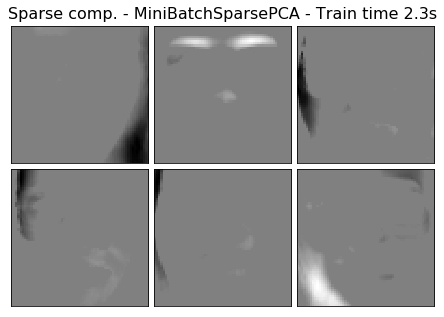

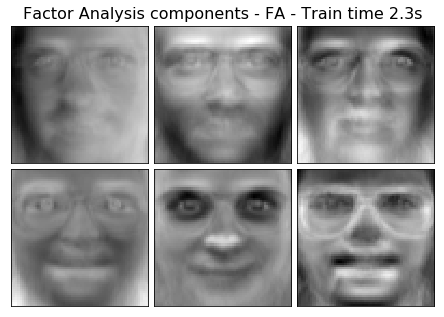

In [1]:
n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)


def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

# #############################################################################
# List of the different estimators, whether to center and transpose the
# problem, and whether the transformer uses the clustering API.
estimators = [
    ('Eigenfaces - PCA using randomized SVD',
     decomposition.PCA(n_components=n_components, svd_solver='randomized',
                       whiten=True),
     True),

    ('Non-negative components - NMF',
     decomposition.NMF(n_components=n_components, init='nndsvda', tol=5e-3),
     False),

    ('Independent components - FastICA',
     decomposition.FastICA(n_components=n_components, whiten=True),
     True),

    ('Sparse comp. - MiniBatchSparsePCA',
     decomposition.MiniBatchSparsePCA(n_components=n_components, alpha=0.8,
                                      n_iter=100, batch_size=3,
                                      random_state=rng),
     True),

    ('MiniBatchDictionaryLearning',
        decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,
                                                  n_iter=50, batch_size=3,
                                                  random_state=rng),
     True),

    ('Cluster centers - MiniBatchKMeans',
        MiniBatchKMeans(n_clusters=n_components, tol=1e-3, batch_size=20,
                        max_iter=50, random_state=rng),
     True),

    ('Factor Analysis components - FA',
     decomposition.FactorAnalysis(n_components=n_components, max_iter=2),
     True),
]


# #############################################################################
# Plot a sample of the input data

plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

# #############################################################################
# Do the estimation and plot it

for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    if center:
        data = faces_centered
    estimator.fit(data)
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
    if hasattr(estimator, 'cluster_centers_'):
        components_ = estimator.cluster_centers_
    else:
        components_ = estimator.components_

    # Plot an image representing the pixelwise variance provided by the
    # estimator e.g its noise_variance_ attribute. The Eigenfaces estimator,
    # via the PCA decomposition, also provides a scalar noise_variance_
    # (the mean of pixelwise variance) that cannot be displayed as an image
    # so we skip it.
    if (hasattr(estimator, 'noise_variance_') and
            estimator.noise_variance_.ndim > 0):  # Skip the Eigenfaces case
        plot_gallery("Pixelwise variance",
                     estimator.noise_variance_.reshape(1, -1), n_col=1,
                     n_row=1)
    plot_gallery('%s - Train time %.1fs' % (name, train_time),
                 components_[:n_components])

plt.show()